In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [7]:
%matplotlib inline

In [8]:
file_path = r"D:\data science\datasets\ipl2024 Matches.csv"


In [9]:
df=pd.read_csv(file_path)

In [10]:
df.shape

(74, 14)

In [11]:
df.head()

,id,date,team1,team2,toss_winner,decision,first_score,first_wkts,second_score,second_wkts,winner,player_of_the_match,most_runs,most_wkts
0,1,"March 22,2024",Banglore,Chennai,Banglore,Bat,173,6,176,4,Chennai,Mustafizur Rahman,Anuj Rawat,Mustafizur Rahman
1,2,"March 23,2024",Delhi,Punjab,Punjab,Field,174,9,177,6,Punjab,Sam Curran,Sam Curran,Kuldeep Yadav
2,3,"March 23,2024",Kolkata,Hyderabad,Hyderabad,Field,208,7,204,7,Kolkata,Andre Russell,Andre Russell,T Natarajan
3,4,"March 24,2024",Rajasthan,Lucknow,Rajasthan,Bat,193,4,173,6,Rajasthan,Sanju Samson,Sanju Samson,Trent Boult
4,5,"March 24,2024",Gujarat,Mumbai,Mumbai,Field,168,6,162,9,Gujarat,Sai Sudharsan,Dewald Brevis,Jasprit Bumrah


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   74 non-null     int64 
 1   date                 74 non-null     object
 2   team1                74 non-null     object
 3   team2                74 non-null     object
 4   toss_winner          74 non-null     object
 5   decision             71 non-null     object
 6   first_score          74 non-null     int64 
 7   first_wkts           74 non-null     int64 
 8   second_score         74 non-null     int64 
 9   second_wkts          74 non-null     int64 
 10  winner               74 non-null     object
 11  player_of_the_match  71 non-null     object
 12  most_runs            71 non-null     object
 13  most_wkts            71 non-null     object
dtypes: int64(5), object(9)
memory usage: 8.2+ KB


In [14]:
df.shape

(74, 14)

In [15]:
print(df.columns)

Index(['id', 'date', 'team1', 'team2', 'toss_winner', 'decision',
       'first_score', 'first_wkts', 'second_score', 'second_wkts', 'winner',
       'player_of_the_match', 'most_runs', 'most_wkts'],
      dtype='object')


In [16]:
df = df.dropna(subset=['decision', 'player_of_the_match', 'most_runs', 'most_wkts']) 

In [17]:
all_teams = pd.concat([df['team1'], df['team2'], df['winner'], df['toss_winner']]).unique()

In [18]:
team_mapping = {team: idx for idx, team in enumerate(all_teams)}

In [24]:
df['team1_encoded'] = df['team1'].map(team_mapping)
df['team2_encoded'] = df['team2'].map(team_mapping)
df['winner_encoded'] = df['winner'].map(team_mapping)
df['toss_encoded'] = df['toss_winner'].map(team_mapping)
df['decision_encoded'] = df['decision'].map({'Bat': 0, 'Field': 1})

In [33]:
features = ['team1_encoded', 'team2_encoded', 'toss_encoded', 'decision_encoded', 'first_score', 'first_wkts']
target = 'winner_encoded'

In [35]:
X = df[features]
y = df[target]

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [41]:
y_pred = model.predict(X_test)


In [43]:
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy Score: 0.4666666666666667

Classification Report:
               precision    recall  f1-score   support

           0       0.33      0.50      0.40         2
           1       0.00      0.00      0.00         3
           2       0.67      0.67      0.67         3
           3       0.25      1.00      0.40         1
           4       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1
           7       1.00      0.50      0.67         2
           8       1.00      1.00      1.00         2

    accuracy                           0.47        15
   macro avg       0.41      0.46      0.39        15
weighted avg       0.46      0.47      0.44        15



C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


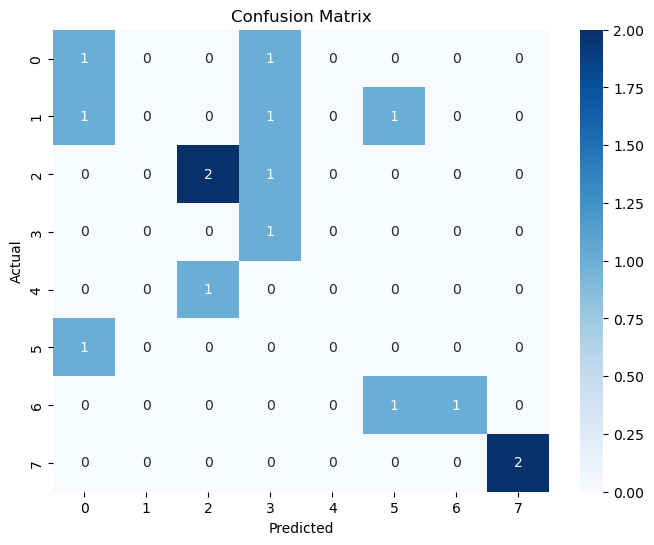

In [45]:
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [47]:
importances = model.feature_importances_
feature_names = X.columns

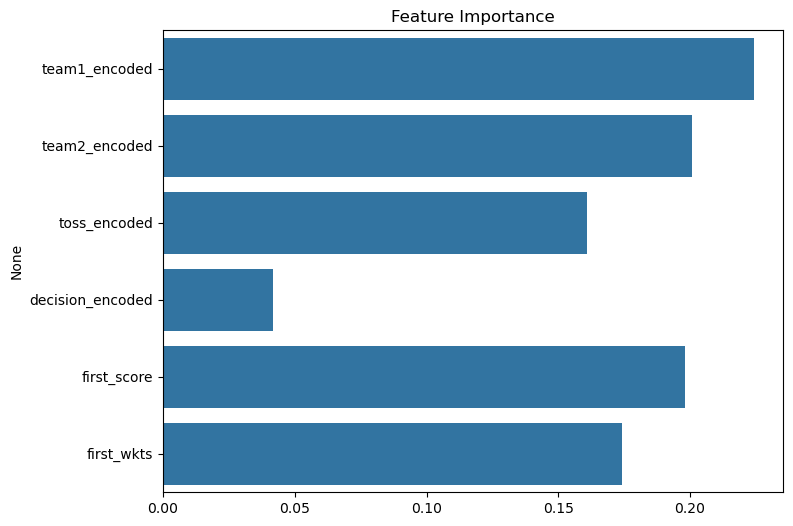

In [49]:
plt.figure(figsize=(8,6))
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importance")
plt.show()

In [51]:
# try modifying it 

In [53]:
df['toss_match'] = (df['toss_winner'] == df['winner']).astype(int)


In [55]:
from sklearn.preprocessing import LabelEncoder

In [57]:
label_cols = ['team1', 'team2', 'toss_winner', 'winner']
for col in label_cols:
    df[col + '_enc'] = LabelEncoder().fit_transform(df[col])

In [91]:
features = [
    'team1_encoded',
    'team2_encoded',
    'toss_winner_enc',
    'toss_encoded',
    'decision_encoded',
    'first_score',
    'first_wkts',
    'second_score',
    'second_wkts'
]

target = 'winner_enc'


In [89]:
print(df.columns.tolist())


['id', 'date', 'team1', 'team2', 'toss_winner', 'decision', 'first_score', 'first_wkts', 'second_score', 'second_wkts', 'winner', 'player_of_the_match', 'most_runs', 'most_wkts', 'team1_encoded', 'team2_encoded', 'winner_encoded', 'toss_encoded', 'decision_encoded', 'toss_match', 'team1_enc', 'team2_enc', 'toss_winner_enc', 'winner_enc']


In [93]:
X = df[features]
y = df[target]

In [95]:
target = 'winner_enc'

In [97]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [99]:
from imblearn.over_sampling import SMOTE

In [101]:
min_samples = y.value_counts().min()

In [103]:
smote = SMOTE(sampling_strategy='auto', k_neighbors=min_samples-1, random_state=42)

In [105]:
X_res, y_res = smote.fit_resample(X, y)

In [107]:
print(y.value_counts())

winner_enc
5    11
9     9
4     9
1     7
0     7
6     7
2     7
8     5
3     5
7     4
Name: count, dtype: int64


In [109]:
print(f"Original X shape: {X.shape}, y shape: {y.shape}")
print(f"Resampled X shape: {X_res.shape}, y shape: {y_res.shape}")

Original X shape: (71, 9), y shape: (71,)
Resampled X shape: (110, 9), y shape: (110,)


In [111]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)


In [115]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [117]:
y_pred = rf_model.predict(X_test)

In [119]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.4545


In [121]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.25      1.00      0.40         1
           1       1.00      0.33      0.50         3
           2       0.67      0.40      0.50         5
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         1
           5       0.25      1.00      0.40         1
           6       0.33      0.50      0.40         2
           7       0.50      1.00      0.67         1
           9       0.75      0.75      0.75         4

    accuracy                           0.45        22
   macro avg       0.42      0.55      0.40        22
weighted avg       0.50      0.45      0.42        22



C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [123]:
features = ['team1_encoded', 'team2_encoded', 'toss_encoded', 'decision_encoded',
            'first_score', 'first_wkts', 'second_score', 'second_wkts']


In [127]:
df['date'] = pd.to_datetime(df['date'], format='%B %d,%Y', errors='coerce')


In [133]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day


In [135]:
features.append('month')
features.append('day')


In [141]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()


In [143]:
df['player_encoded'] = encoder.fit_transform(df['player_of_the_match'].astype(str))
df['most_runs_encoded'] = encoder.fit_transform(df['most_runs'].astype(str))
df['most_wkts_encoded'] = encoder.fit_transform(df['most_wkts'].astype(str))


In [145]:
from sklearn.model_selection import GridSearchCV

In [147]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


In [155]:
grid_search = GridSearchCV(RandomForestClassifier(random_state=42),
                           param_grid, cv=5, scoring='accuracy')

In [157]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [159]:
best_model = grid_search.best_estimator_

In [161]:
import matplotlib.pyplot as plt

In [171]:
print(len(model.feature_importances_))
print(len(X_train.columns))


6
9


In [173]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

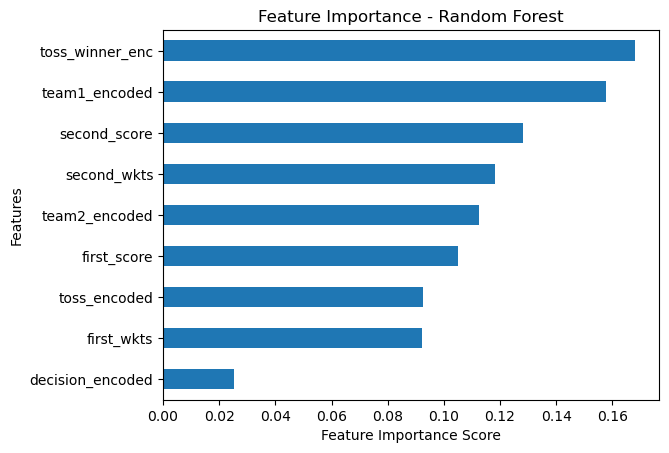

In [175]:
feature_importances = pd.Series(rf_model.feature_importances_, index=X_train.columns)
feature_importances.sort_values().plot(kind='barh')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance - Random Forest')
plt.show()


In [177]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [179]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [181]:
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy',
                           n_jobs=-1,
                           verbose=2)

In [183]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=2)

In [185]:
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy on Train Data:", grid_search.best_score_)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Accuracy on Train Data: 0.5241830065359478


In [187]:
# modifying it futher 
df['score_diff'] = df['first_score'] - df['second_score']
df['wkt_diff'] = df['first_wkts'] - df['second_wkts']


In [189]:
df['toss_match'] = (df['toss_winner'] == df['winner']).astype(int)


In [191]:
df['player_enc'] = encoder.fit_transform(df['player_of_the_match'].astype(str))
df['most_runs_enc'] = encoder.fit_transform(df['most_runs'].astype(str))
df['most_wkts_enc'] = encoder.fit_transform(df['most_wkts'].astype(str))


In [193]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

print(accuracy_score(y_test, y_pred))


0.5909090909090909


In [195]:
from sklearn.ensemble import VotingClassifier

ensemble_model = VotingClassifier(estimators=[
    ('rf', rf_model),
    ('xgb', xgb_model)
], voting='soft')

ensemble_model.fit(X_train, y_train)

y_pred = ensemble_model.predict(X_test)
print("Ensemble Accuracy:", accuracy_score(y_test, y_pred))


Ensemble Accuracy: 0.5909090909090909


In [197]:
win_count = df.groupby('team1')['winner'].apply(lambda x: (x == x.name).sum()).to_dict()
df['team1_win_count'] = df['team1'].map(win_count)
df['team2_win_count'] = df['team2'].map(win_count)


In [207]:
pip install lightgbm


   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   -------------- ------------------------- 0.5/1.5 MB 2.8 MB/s eta 0:00:01
   ------------------------------------ --- 1.3/1.5 MB 3.4 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 3.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [209]:
from lightgbm import LGBMClassifier

lgbm_model = LGBMClassifier()
lgbm_model.fit(X_train, y_train)

y_pred = lgbm_model.predict(X_test)
print(accuracy_score(y_test, y_pred))


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000131 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 114
[LightGBM] [Info] Number of data points in the train set: 88, number of used features: 9
[LightGBM] [Info] Start training from score -2.174752
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.685577
[LightGBM] [Info] Start training from score -2.531427
[LightGBM] [Info] Start training from score -2.174752
[LightGBM] [Info] Start training from score -2.174752
[LightGBM] [Info] Start training from score -2.280112
[LightGBM] [Info] Start training from score -2.174752
[LightGBM] [Info] Start training from score -2.079442
[LightGBM] [Info] Start training from score -2.531427
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further split

C:\Users\hp\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\hp\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\hp\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\hp\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\hp\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable

In [211]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(xgb_model, X_train, y_train, cv=5)
print("Cross Validation Accuracy:", scores.mean())


Cross Validation Accuracy: 0.534640522875817


In [213]:
import joblib
joblib.dump(xgb_model, 'final_xgb_model.pkl')


['final_xgb_model.pkl']